In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_columns', 30)

In [3]:
print(plt.rcParams["figure.figsize"])

[6.0, 4.0]


In [4]:
species_codes_list = ['chiswi', 'comnig', 'barswa', 'cliswa', 'purmar', 'nrwswa', 'treswa', 'chwwid', 'whip-p1', 
                      'banswa']

scientific_list = ['Chaetura_pelagica', 'Chordeiles_minor', 'Hirundo_rustica', 'Petrochelidon_pyrrhonota', 
                   'Progne_subis', 'Stelgidopteryx_serripennis', 'Tachycineta_bicolor', 'Antrostomus_carolinensis', 
                   'Antrostomus_vociferus', 'Riparia_riparia']

27216
4746
Chaetura_pelagica
818
chiswi
1016
both          804
left_only     212
right_only      0
Name: _merge, dtype: int64
25.91687041564792
both          804
left_only      14
right_only      0
Name: _merge, dtype: int64


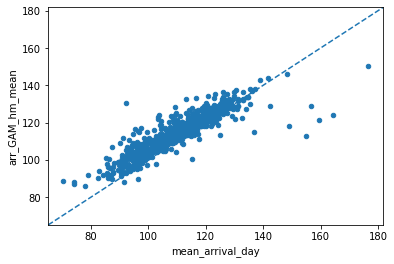

27216
4746
Chordeiles_minor
329
comnig
405
both          270
left_only     135
right_only      0
Name: _merge, dtype: int64
41.03343465045592
both          270
left_only      59
right_only      0
Name: _merge, dtype: int64


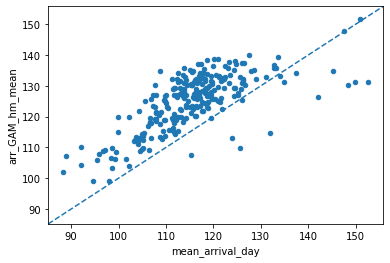

27216
4746
Hirundo_rustica
801
barswa
1114
both          793
left_only     321
right_only      0
Name: _merge, dtype: int64
40.074906367041194
both          793
left_only       8
right_only      0
Name: _merge, dtype: int64


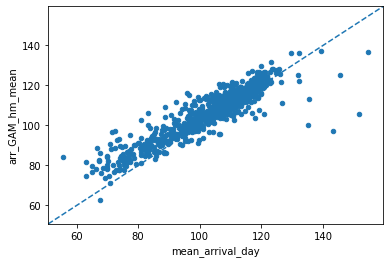

27216
4746
Petrochelidon_pyrrhonota
395
cliswa
604
both          381
left_only     223
right_only      0
Name: _merge, dtype: int64
56.45569620253165
both          381
left_only      14
right_only      0
Name: _merge, dtype: int64


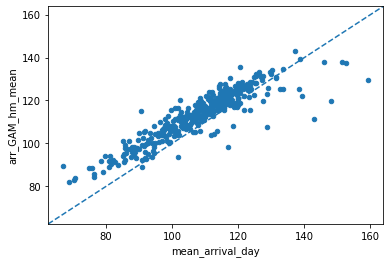

27216
4746
Progne_subis
333
purmar
774
left_only     452
both          322
right_only      0
Name: _merge, dtype: int64
135.73573573573574
both          322
left_only      11
right_only      0
Name: _merge, dtype: int64


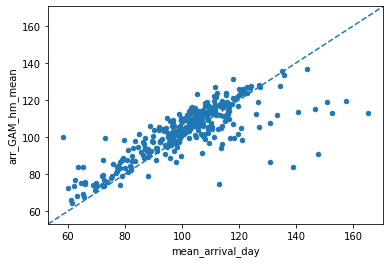

27216
4746
Stelgidopteryx_serripennis
720
nrwswa
914
both          687
left_only     227
right_only      0
Name: _merge, dtype: int64
31.52777777777778
both          687
left_only      33
right_only      0
Name: _merge, dtype: int64


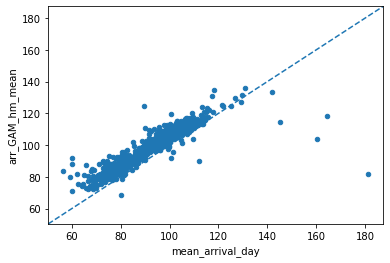

27216
4746
Tachycineta_bicolor
676
treswa
1039
both          663
left_only     376
right_only      0
Name: _merge, dtype: int64
55.62130177514793
both          663
left_only      13
right_only      0
Name: _merge, dtype: int64


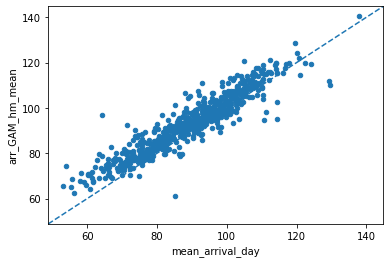

27216
4746
Antrostomus_carolinensis
178
chwwid
259
both          164
left_only      95
right_only      0
Name: _merge, dtype: int64
53.37078651685393
both          164
left_only      14
right_only      0
Name: _merge, dtype: int64


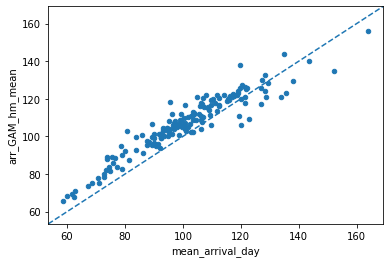

27216
4746
Antrostomus_vociferus
219
whip-p1
342
both          204
left_only     138
right_only      0
Name: _merge, dtype: int64
63.013698630136986
both          204
left_only      15
right_only      0
Name: _merge, dtype: int64


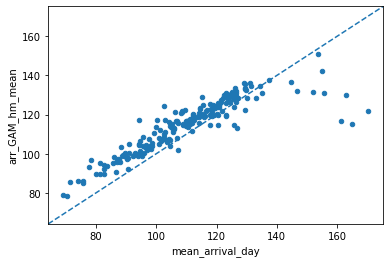

27216
4746
Riparia_riparia
276
banswa
459
both          250
left_only     209
right_only      0
Name: _merge, dtype: int64
75.72463768115942
both          250
left_only      26
right_only      0
Name: _merge, dtype: int64


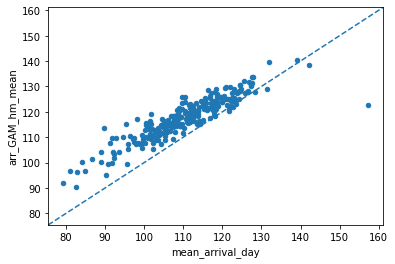

In [5]:
for i in range(len(species_codes_list)):

#     print(os.getcwd())

    path = '/Volumes/TOSHIBA EXT/Data/Processed/IAR_input_2022-02-05/'

    os.chdir(path)

#     print(os.getcwd())

    filename = 'IAR_input-2022-02-05.csv'

    df_gam = pd.read_csv(filename)
    print(len(df_gam))

    df_gam = df_gam[df_gam['VALID_hm'] == True]
    print(len(df_gam))

    # print(df_gam.head(2))

    scientific_name = scientific_list[i]
    print(scientific_name)

    df_gam_species = df_gam[df_gam['species'] == scientific_name]
    print(len(df_gam_species))

    # print(df_gam_species.head(2))

#     print(os.getcwd())

    path = '/Users/alvastrand/' + \
    'Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/eBird/ebd_output/'

    os.chdir(path)

#     print(os.getcwd())

    species = species_codes_list[i]
    print(species)

    filename = 'ebd_US_states_east_Mississippi_' + species + \
    '_0101_0731_complete_zerofilled_grid_cells_proportions_mean_relApr-2020_v3.csv'

    df = pd.read_csv(filename)

    df = df.sort_values(by=['year', 'grid_cell']).reset_index(drop=True)

    df = df.rename(columns={'grid_cell': 'cell'})
    print(len(df))

    # print(df.head(2))

    df_merged = df_gam_species.merge(df, on=['year', 'cell'])
#     print(len(df_merged))

    df_merged.head(2)
    
    if i == 0:
        df_merged_all = df_merged
        
    else:
        df_merged_all = df_merged_all.append(df_merged)
        
    df_merged_indicator = df.merge(df_gam_species, on=['year', 'cell'], how='left', indicator=True)
#     print(len(df_merged_indicator))

#     print(df_merged_indicator.head(2))
    
    print(df_merged_indicator['_merge'].value_counts())
    
    print(df_merged_indicator['_merge'].value_counts()['left_only']/len(df_gam_species) * 100)
        
    df_merged_indicator_gam = df_gam_species.merge(df, on=['year', 'cell'], how='left', indicator=True)
#     print(len(df_merged_indicator_gam))

#     print(df_merged_indicator_gam.head(2))
    
    print(df_merged_indicator_gam['_merge'].value_counts())
    
    fig, ax = plt.subplots()

    df_merged.plot('mean_arrival_day', 'arr_GAM_hm_mean', kind='scatter', ax=ax)
    
    low_x, high_x = ax.get_xlim()
#     print(low_x, high_x)
    
    low_y, high_y = ax.get_ylim()
#     print(low_y, high_y)
    
    low = min(low_x, low_y)
#     print(low)
    
    high = max(high_x, high_y)
#     print(high)
    
    ax.set_xlim(low, high)
    ax.set_ylim(low, high)
    
    ax.plot([0, 1], [0, 1], linestyle='dashed', transform=ax.transAxes)

    plt.show()

46.67539048610512
187.5066125498678


Text(0, 0.5, 'Mean arrival day (GAM)')

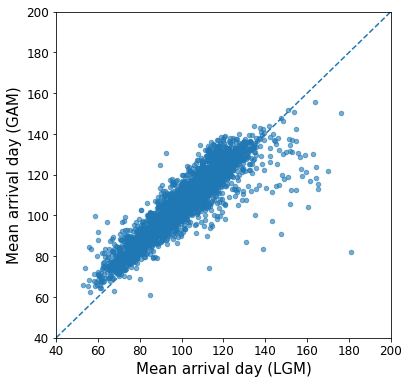

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))

# plt.subplots_adjust(left=0.15, top=0.98, right=0.965)

df_merged_all.plot('mean_arrival_day', 'arr_GAM_hm_mean', kind='scatter', s=20, alpha=0.6, ax=ax)

low_x, high_x = ax.get_xlim()
# print(low_x, high_x)

low_y, high_y = ax.get_ylim()
# print(low_y, high_y)

low = min(low_x, low_y)
print(low)

high = max(high_x, high_y)
print(high)

ax.set_xlim(low, high)
ax.set_ylim(low, high)

ax.plot([0, 1], [0, 1], linestyle='dashed', transform=ax.transAxes)

font_size = 15
smaller_font_size = 12

plt.rc('font', size=font_size)
plt.rc('xtick', labelsize=smaller_font_size)
plt.rc('ytick', labelsize=smaller_font_size)

ticks = range(40, 220, 20)

ax.set_xticks(ticks)
ax.set_yticks(ticks)

plt.xlabel('Mean arrival day (LGM)')
plt.ylabel('Mean arrival day (GAM)')

# plt.show()

# path = '/Users/alvastrand/Downloads/'

# os.chdir(path)

# filename = 'mean_arrival_days.png'

# plt.savefig(filename, dpi=256)

In [ ]:
print(len(df_merged_all))

df_merged_all.head(2)

In [ ]:
df_merged_barswa = df_merged_all[df_merged_all['species'] == 'Hirundo_rustica']

df_merged_barswa = df_merged_barswa.sort_values(by=['cell', 'year'])

df_merged_barswa = df_merged_barswa.reset_index(drop=True)

print(len(df_merged_barswa))

df_merged_barswa.head(2)

In [ ]:
len(df_merged_barswa['cell'].unique())

In [ ]:
df_merged_barswa[(df_merged_barswa['cell'] == 122) & (df_merged_barswa['year'] == 2019)]